<a href="https://colab.research.google.com/github/Rojan116/NepaliHandWrittenAlphabetRecognizer/blob/master/59_class_augmented_cnn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Rojan116/NepaliHandWrittenAlphabetRecognizer.git

Cloning into 'NepaliHandWrittenAlphabetRecognizer'...
remote: Enumerating objects: 8026, done.
remote: Counting objects: 100% (8026/8026), done.
remote: Compressing objects: 100% (7990/7990), done.
remote: Total 105557 (delta 167), reused 7884 (delta 35), pack-reused 97531
Receiving objects: 100% (105557/105557), 139.71 MiB | 37.48 MiB/s, done.
Resolving deltas: 100% (1717/1717), done.
Checking out files: 100% (106171/106171), done.


In [2]:
ls

NepaliHandWrittenAlphabetRecognizer/  sample_data/


In [3]:
cd NepaliHandWrittenAlphabetRecognizer

/content/NepaliHandWrittenAlphabetRecognizer


In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tqdm import tqdm
import random
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

Using TensorFlow backend.


In [0]:
PATH = os.getcwd()
DATADIR = PATH + '/nepalibarnasnew/Train'   
train_data_path = PATH + '/nepalibarnasnew/Train'
test_data_path = PATH + '/nepalibarnasnew/Test'


In [6]:
#counting categories
new_cat = []
for x in os.listdir(train_data_path):
  new_cat.append(x)

print(new_cat)  
classes = np.unique(new_cat)
print(len(classes))


['character-34-chyan', 'digits_4', 'character-12-tha', 'digits_9', 'character-32-sa', 'digits_6', 'vowel_7_e', 'character-05-n..a', 'vowel_0_a', 'character-22-pha', 'character-28-la', 'character-20-na', 'digits_7', 'character-03-ga', 'vowel_11_am', 'character-24-bha', 'character-29-wa', 'vowel_4_u', 'vowel_2_i', 'character-15-na', 'digits_8', 'character-08-ja', 'character-09-jha', 'character-30-sa', 'character-35-tra', 'character-17-tha', 'digits_5', 'character-10-yaa', 'character-26-ya', 'character-13-da', 'character-01-ka', 'vowel_5_uu', 'vowel_12_ah', 'character-16-ta', 'character-31-sa', 'character-11-ta', 'character-19-dha', 'character-36-gyan', 'character-04-gha', 'digits_1', 'vowel_10_au', 'character-02-kha', 'character-25-ma', 'character-06-cha', 'character-21-pa', 'character-33-ha', 'character-27-ra', 'vowel_8_ei', 'digits_0', 'digits_2', 'character-14-dha', 'vowel_6_re', 'character-18-da', 'vowel_9_o', 'character-07-chha', 'vowel_1_aa', 'vowel_3_ii', 'digits_3', 'character-23

In [0]:
CATEGORIES =[

"character-01-ka","character-02-kha","character-03-ga","character-04-gha","character-05-n..a",
"character-06-cha","character-07-chha","character-08-ja","character-09-jha","character-10-yaa",
"character-11-ta","character-12-tha","character-13-da","character-14-dha","character-15-na",
"character-16-ta","character-17-tha","character-18-da","character-19-dha","character-20-na","character-21-pa",
"character-22-pha","character-23-ba","character-24-bha","character-25-ma","character-26-ya","character-27-ra",
"character-28-la","character-29-wa","character-30-sa","character-31-sa","character-32-sa",
"character-33-ha","character-34-chyan","character-35-tra","character-36-gyan","digits_0","digits_1","digits_2","digits_3",
"digits_4","digits_5","digits_6","digits_7","digits_8","digits_9","vowel_0_a","vowel_1_aa","vowel_2_i","vowel_3_ii","vowel_4_u",
"vowel_5_uu","vowel_6_re","vowel_7_e","vowel_8_ei","vowel_9_o","vowel_10_au","vowel_11_am","vowel_12_ah"

]

In [0]:
IMG_SIZE = 32
training_data = []
testing_data = []

def create_training_data():
  for catagory in CATEGORIES:
    path = os.path.join(train_data_path, catagory)
    class_num = CATEGORIES.index(catagory)
    for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
          training_data.append([new_array,class_num])
        except Exception as e:
          pass



def create_testing_data():
  for catagory in CATEGORIES:
    path = os.path.join(test_data_path, catagory)
    class_num = CATEGORIES.index(catagory)
    for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
          testing_data.append([new_array,class_num])
        except Exception as e:
          pass



create_training_data()
create_testing_data()


In [9]:
#shuffle training data for trainning diff image set in every batch
random.shuffle(training_data)

#hot encode image dataset

train_x = []
train_y = []
test_x = []
test_y = []



#seperating features and labels from list
for features, labels in training_data:
	train_x.append(features)
	train_y.append(labels)

for features, labels in testing_data:
	test_x.append(features)
	test_y.append(labels)


#converting list to array
train_y_array = np.array(train_y)
test_y_array = np.array(test_y)

#converting image dataset to input 32*32 dataset 

train_image_array = np.array(train_x).reshape(-1,32,32,1)
test_image_array = np.array(test_x).reshape(-1,32,32,1)

#counting total number of class in dataset
classes = np.unique(test_y_array)
print(classes)
print("total number of class={} ".format(len(classes)))



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58]
total number of class=59 


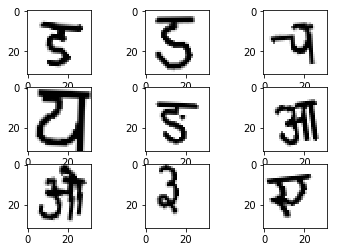

In [10]:
# convert from int to float
x_train = train_image_array.astype('float32')
x_test = test_image_array.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True,
                             rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                              zoom_range=0.2
                            )
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, train_y, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(32, 32), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

In [0]:

#one hot enoded class 
train_y = to_categorical(train_y_array)
test_y = to_categorical(test_y_array)


train_y = np.array(train_y)
test_y = np.array(test_y)

#all train x, y and test x y are in array form now


In [0]:
#new model

# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(59, activation = "softmax"))

# Define the optimizer
#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer = Adam(lr=0.0001)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

#model.summary()



In [14]:
history = model.fit(x=train_image_array,y=train_y,epochs=200,batch_size=100, validation_split=0.3)

W0731 17:45:10.910261 140441149577088 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5723 samples, validate on 2453 samples
Epoch 1/200
5723/5723 [==============================] - 8s 1ms/step - loss: 15.7904 - acc: 0.0166 - val_loss: 15.8553 - val_acc: 0.0163
Epoch 2/200
5723/5723 [==============================] - 1s 163us/step - loss: 15.7999 - acc: 0.0173 - val_loss: 15.8213 - val_acc: 0.0163
Epoch 3/200
5723/5723 [==============================] - 1s 158us/step - loss: 15.7559 - acc: 0.0199 - val_loss: 15.8027 - val_acc: 0.0196
Epoch 4/200
5723/5723 [==============================] - 1s 159us/step - loss: 15.7929 - acc: 0.0185 - val_loss: 15.8487 - val_acc: 0.0167
Epoch 5/200
5723/5723 [==============================] - 1s 157us/step - loss: 15.8137 - acc: 0.0182 - val_loss: 15.8553 - val_acc: 0.0163
Epoch 6/200
5723/5723 [==============================] - 1s 160us/step - loss: 15.8466 - acc: 0.0166 - val_loss: 15.8553 - val_acc: 0.0163
Epoch 7/200
5723/5723 [==============================] - 1s 160us/step - loss: 15.8388 - acc: 0.0171 - val_loss: 15.8553

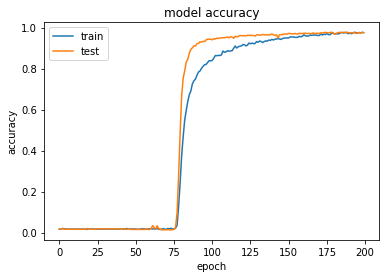

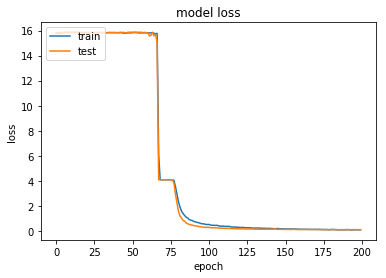

In [15]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
img = test_x[100].reshape(-1,32,32,1)
belongs_to_class = test_y[100]

In [34]:
print(img.shape)

(1, 32, 32, 1)


In [0]:
x = model.predict(img)

In [36]:
print(x)

[[2.14757758e-08 3.09535897e-10 3.43126816e-09 2.61070227e-07
  1.50237554e-06 3.72587827e-09 9.58943247e-07 9.27720345e-10
  1.22778732e-10 5.46494905e-10 9.42132890e-01 5.72955199e-02
  4.47783910e-04 5.14512885e-06 1.45473356e-10 3.85983270e-07
  8.21578539e-08 7.79602778e-05 1.19105074e-07 1.65999575e-10
  2.86980537e-08 1.97427497e-09 2.19189058e-08 6.17280810e-11
  4.72178829e-09 3.90198593e-08 3.19518108e-07 1.16841310e-08
  1.12067210e-05 4.85117946e-10 3.08907760e-10 2.94239055e-09
  1.43297802e-06 3.39792604e-11 3.10328185e-09 1.54982849e-11
  1.98902726e-05 3.74561523e-07 8.70204673e-08 1.82933246e-09
  1.88207575e-11 1.01756815e-11 9.14502323e-07 1.07203206e-07
  1.78755704e-06 1.67498371e-08 6.82064405e-11 1.66512984e-10
  6.08075794e-08 1.92302849e-08 9.78560251e-07 2.79637713e-09
  3.54248597e-12 1.25429924e-08 2.10282476e-08 2.56440945e-11
  9.21887458e-13 1.13061557e-11 2.44573174e-14]]


In [0]:
name = CATEGORIES[np.argmax(x)]
bc = CATEGORIES[np.argmax(belongs_to_class)]

predicted image is of: character-11-ta with accuracy 97.0
Actual class label is: character-11-ta


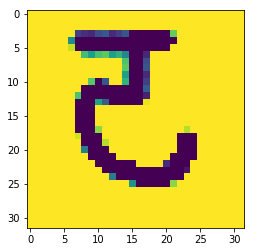

In [38]:
%matplotlib inline
imgplot = plt.imshow(test_x[100])
acc=np.amax(history.history['acc'])
acc= acc*100
acc = np.trunc(acc)

print("predicted image is of: {} with accuracy {}".format(name,acc))
print("Actual class label is: {}".format(bc))



In [0]:
datagen.fit(x_train)